In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import math
from scipy.interpolate import interp1d
from IPython.core.pylabtools import figsize # import figsize
from scipy.interpolate import interp1d
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 400 #分辨率
from scipy.optimize import curve_fit

In [164]:
ERBand = uproot.open("./build/testPandaX4T.root")["ER_Band"]
NRBand = uproot.open("./build/testPandaX4T.root")["NR_Band"]

ER = ERBand.values()
NR = NRBand.values()
NR.shape

(800, 500)

# to get median and err

In [165]:
def gaus(x,a,x0,sigma):
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

In [166]:
median = []
medianErr = []

for i in range(30, len(NR)):
    
    #median
    temp = NR[i,:]
    cums = np.cumsum(temp) / np.sum(temp)
    f = interp1d(cums, temp)
    value = [f(0.5)]
    index = temp.tolist().index(min(temp, key=lambda x:abs(x-value)))
    median.append(index)
    
    #err of median
    popt, pcov = curve_fit(gaus,np.linspace(0.,500.,500), temp.tolist())
    sigma = abs(popt[2] * 1.2533)
    medianErr.append(sigma)


# store the ER events in each S1

In [167]:
numER = []

for i in range(30, len(ER)):
    temp = ER[i,:]
    numER.append(np.sum(temp))
    


# randomly get median and do rejection

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
68.6856701374054


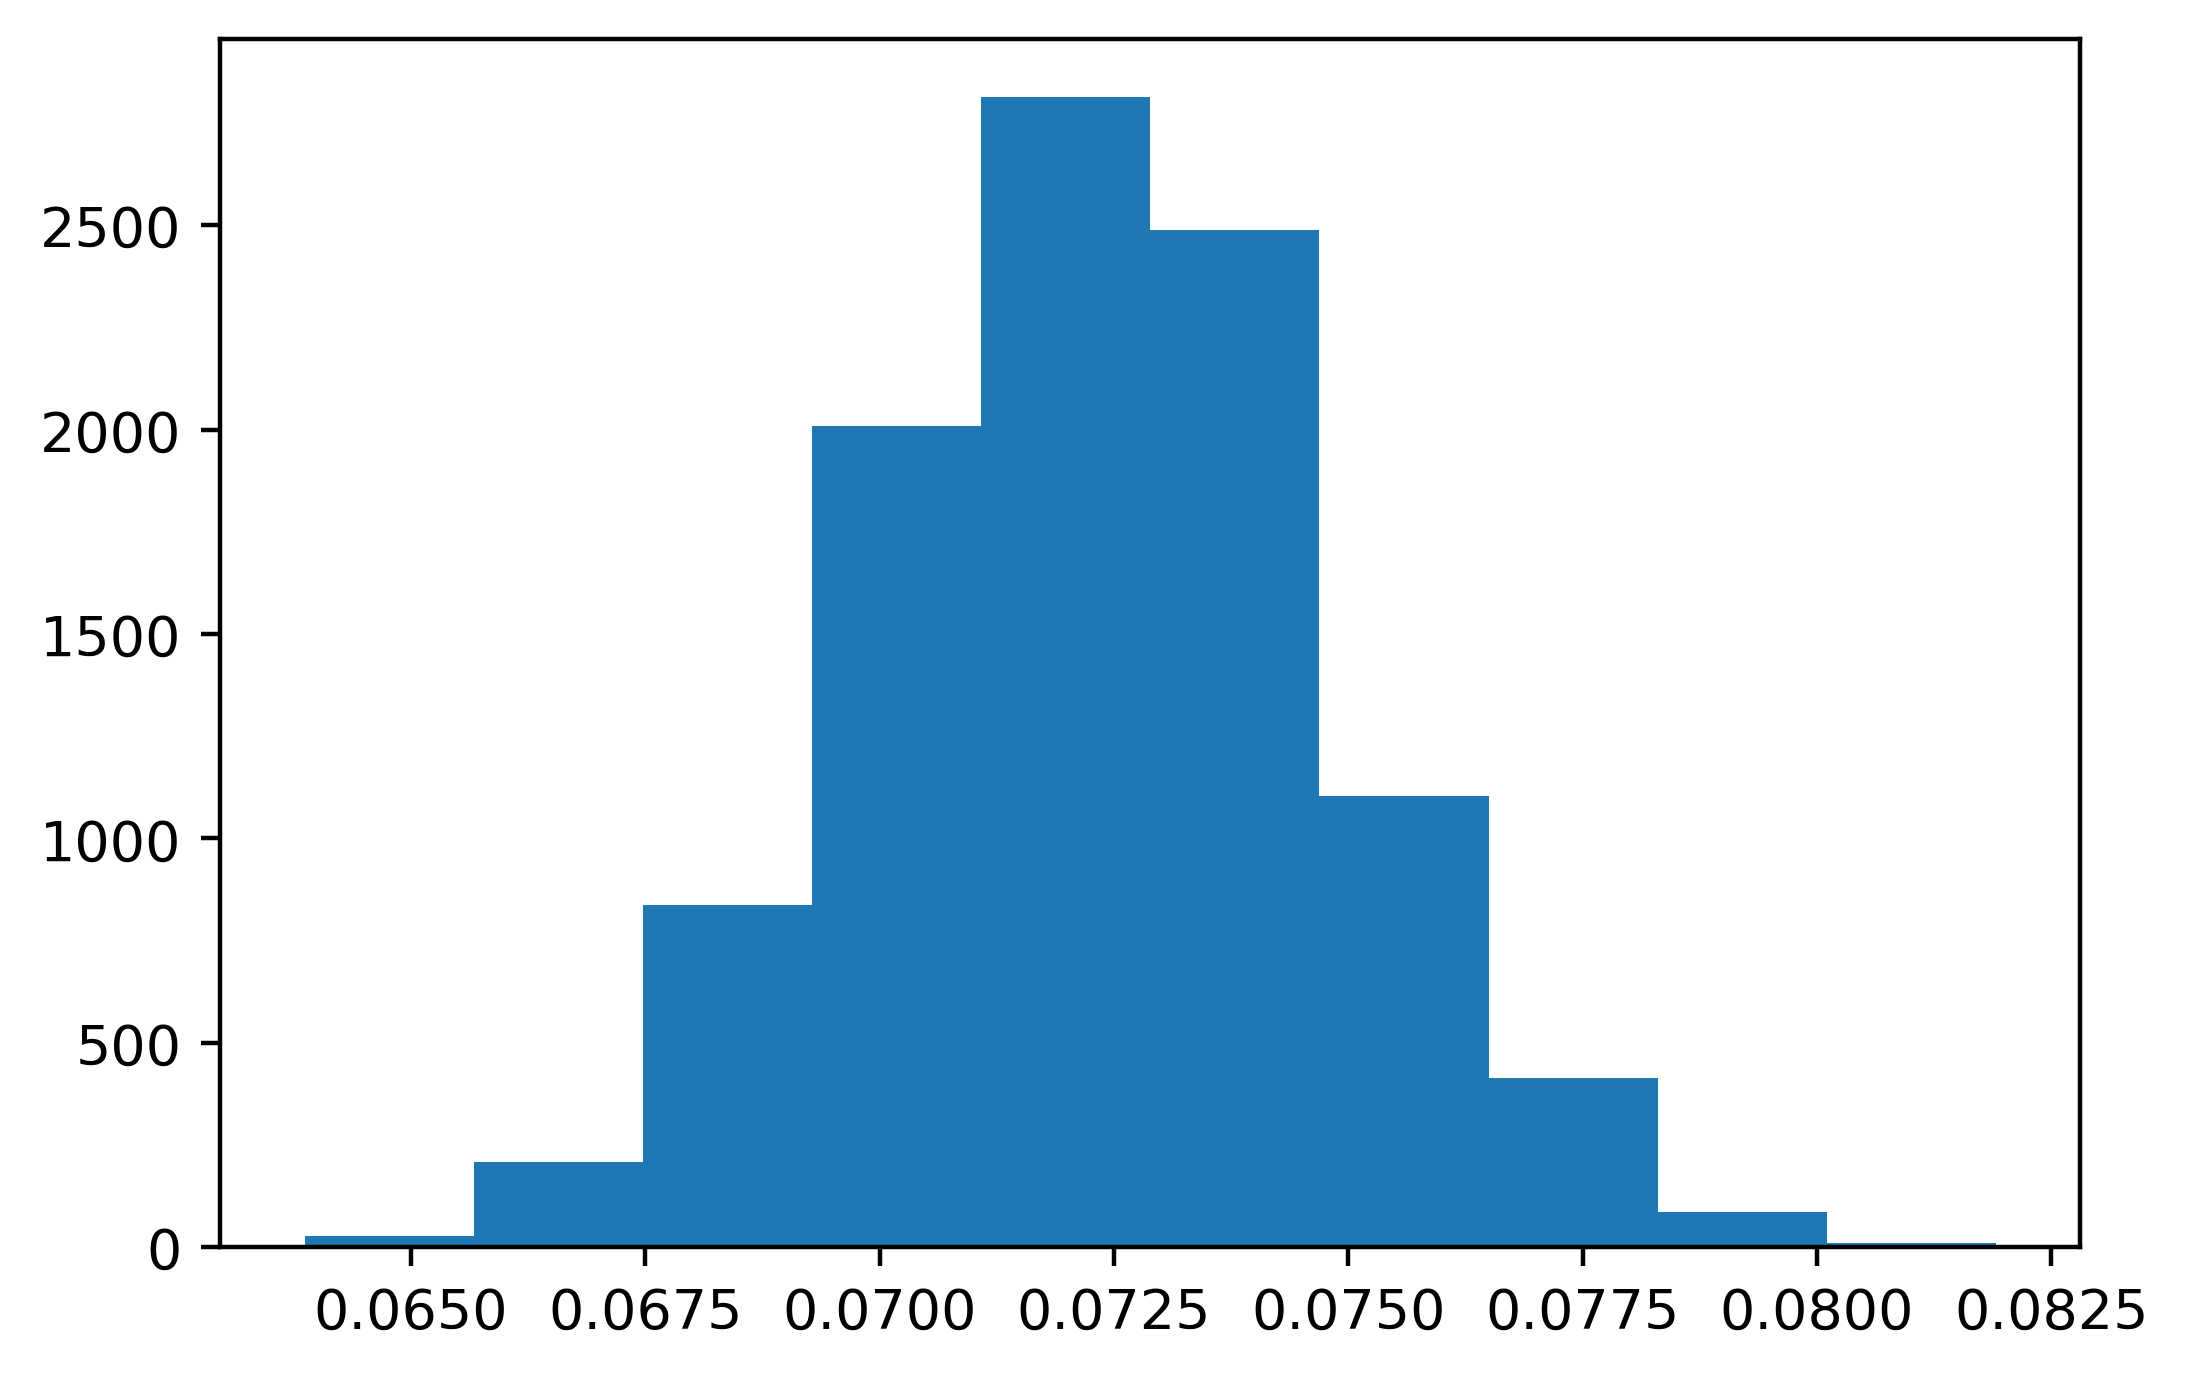

In [168]:
import time
startTime = time.time()

Nsim = 10000

lr = []
for i in range(Nsim):
    if i%1000==0:
        print(i)
    LR = []
    for j in range(30, len(ER)):
        index = j - 30
        Median = int(np.random.normal(median[index], medianErr[index]) + 0.5)
        temp = ER[j,:]
        LR.append(np.sum(temp[0:int(Median + 0.5)])/numER[index])
    lr.append(np.sum([LR[k] * numER[k] for k in range(len(ER) - 30)])/np.sum(numER) * 100)
    
plt.hist(lr)
print(time.time() - startTime)
    
        

In [169]:
from scipy.stats import norm
mean,std=norm.fit(lr)
print(mean,std)

0.07229553279188572 0.002491273520605755


# to see the lr vs. s1

In [170]:
lr = []
lrErr = []
for i in range(30,len(NR)):
    temp = ER[i,:]
    LR = []
    index = i - 30
    for j in range(Nsim):
        LR.append(np.sum(temp[0:int(median[index] + 0.5)])/numER[index] * 100)
    mean,std = norm.fit(LR)
    lr.append(mean)
    lrErr.append(std)


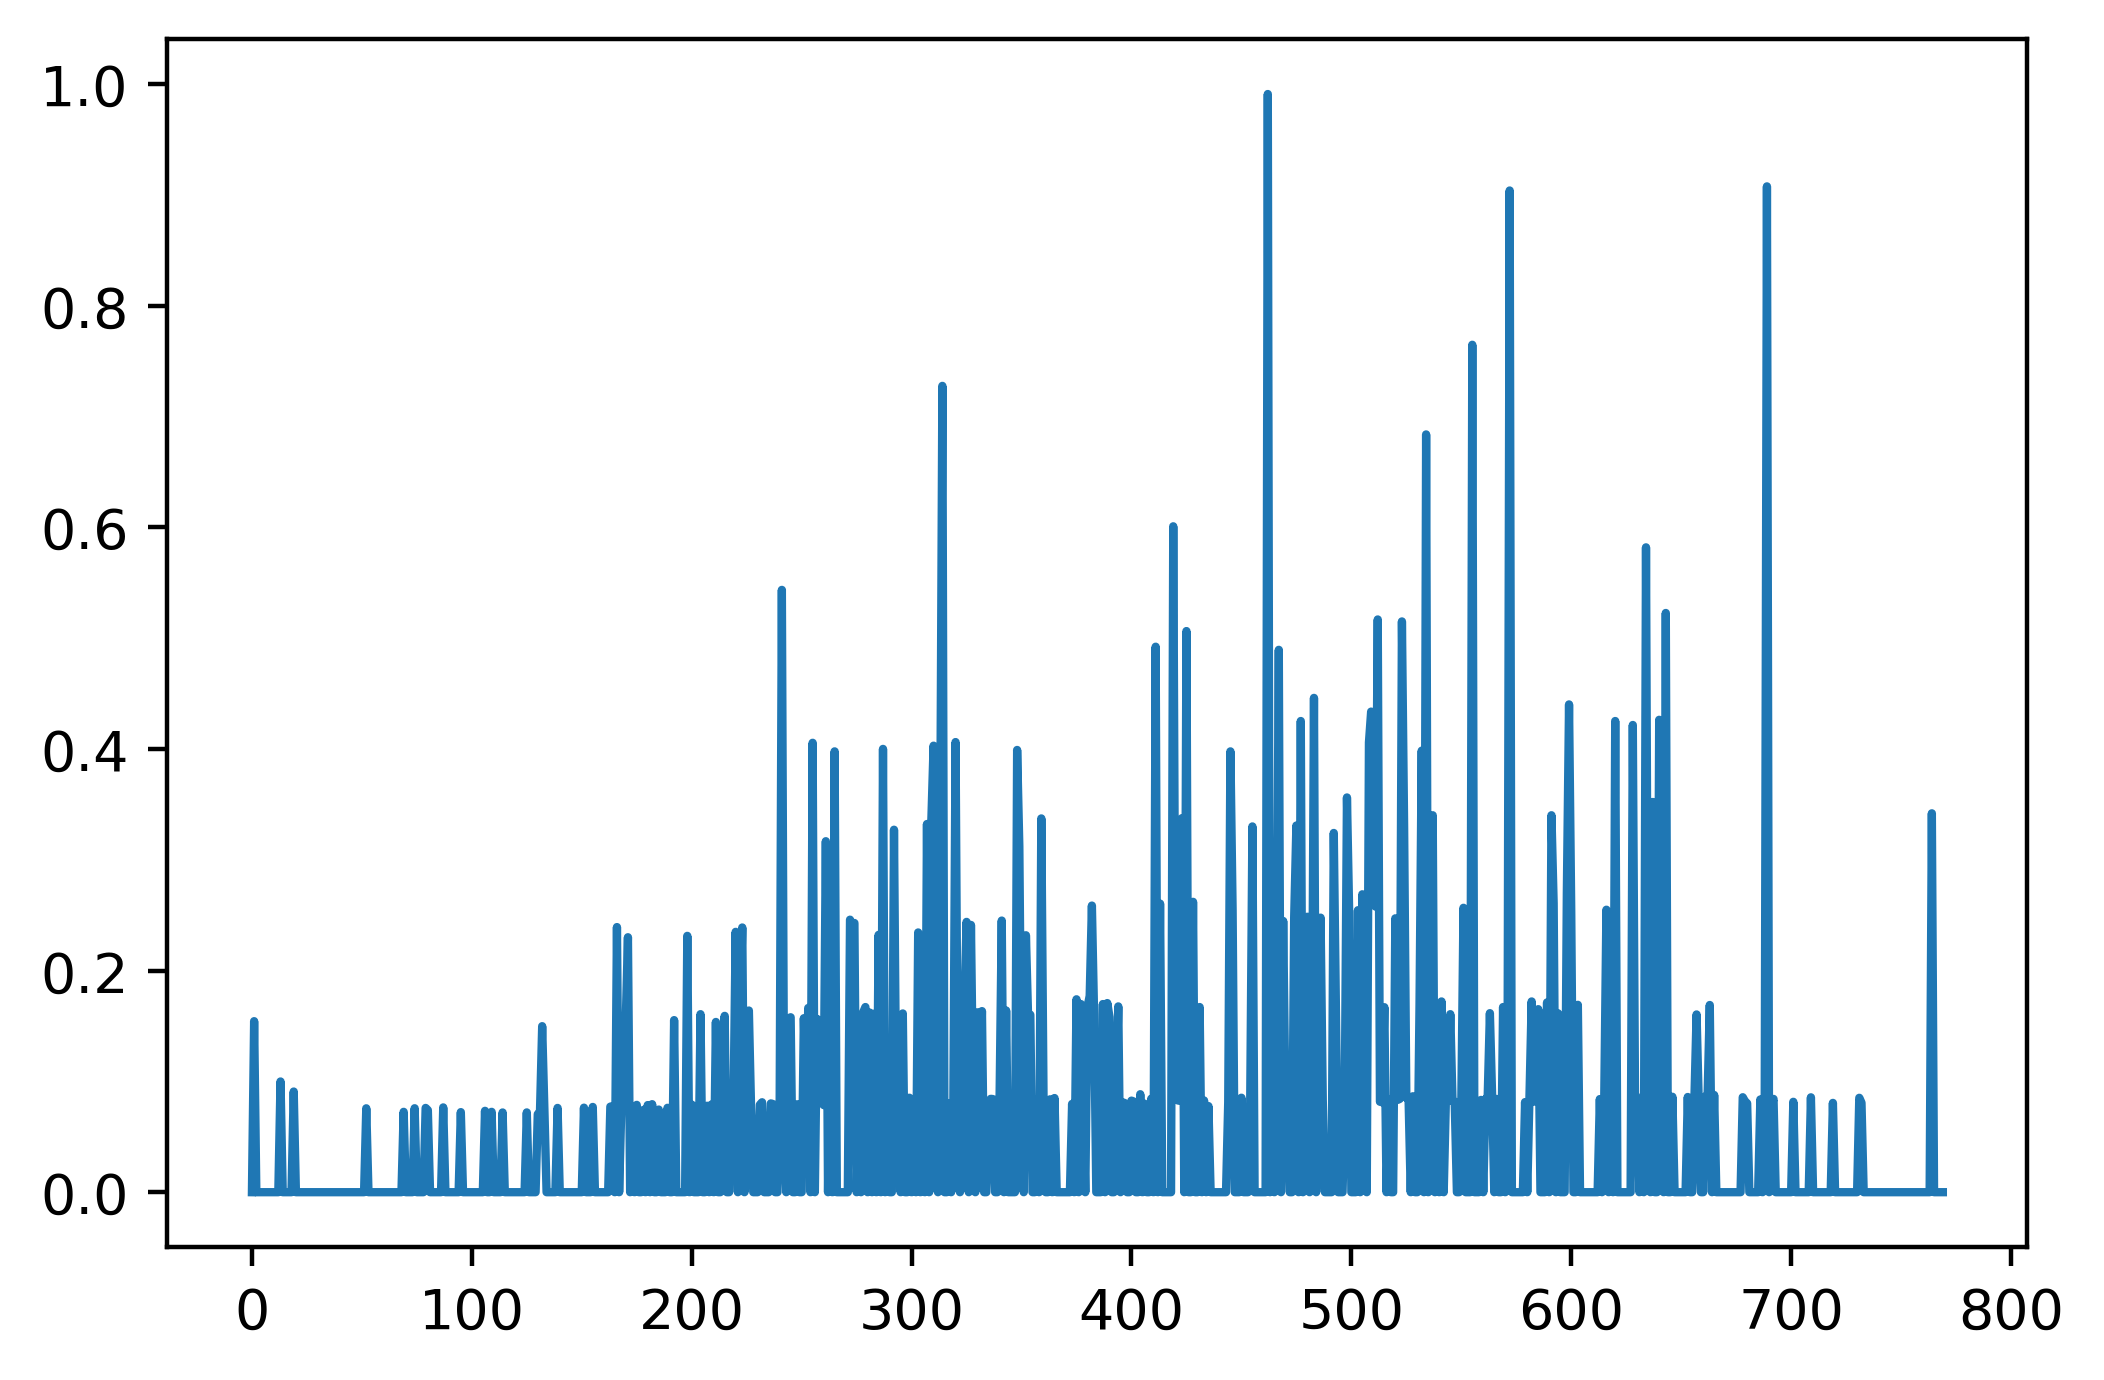

In [171]:
plt.plot(lr)

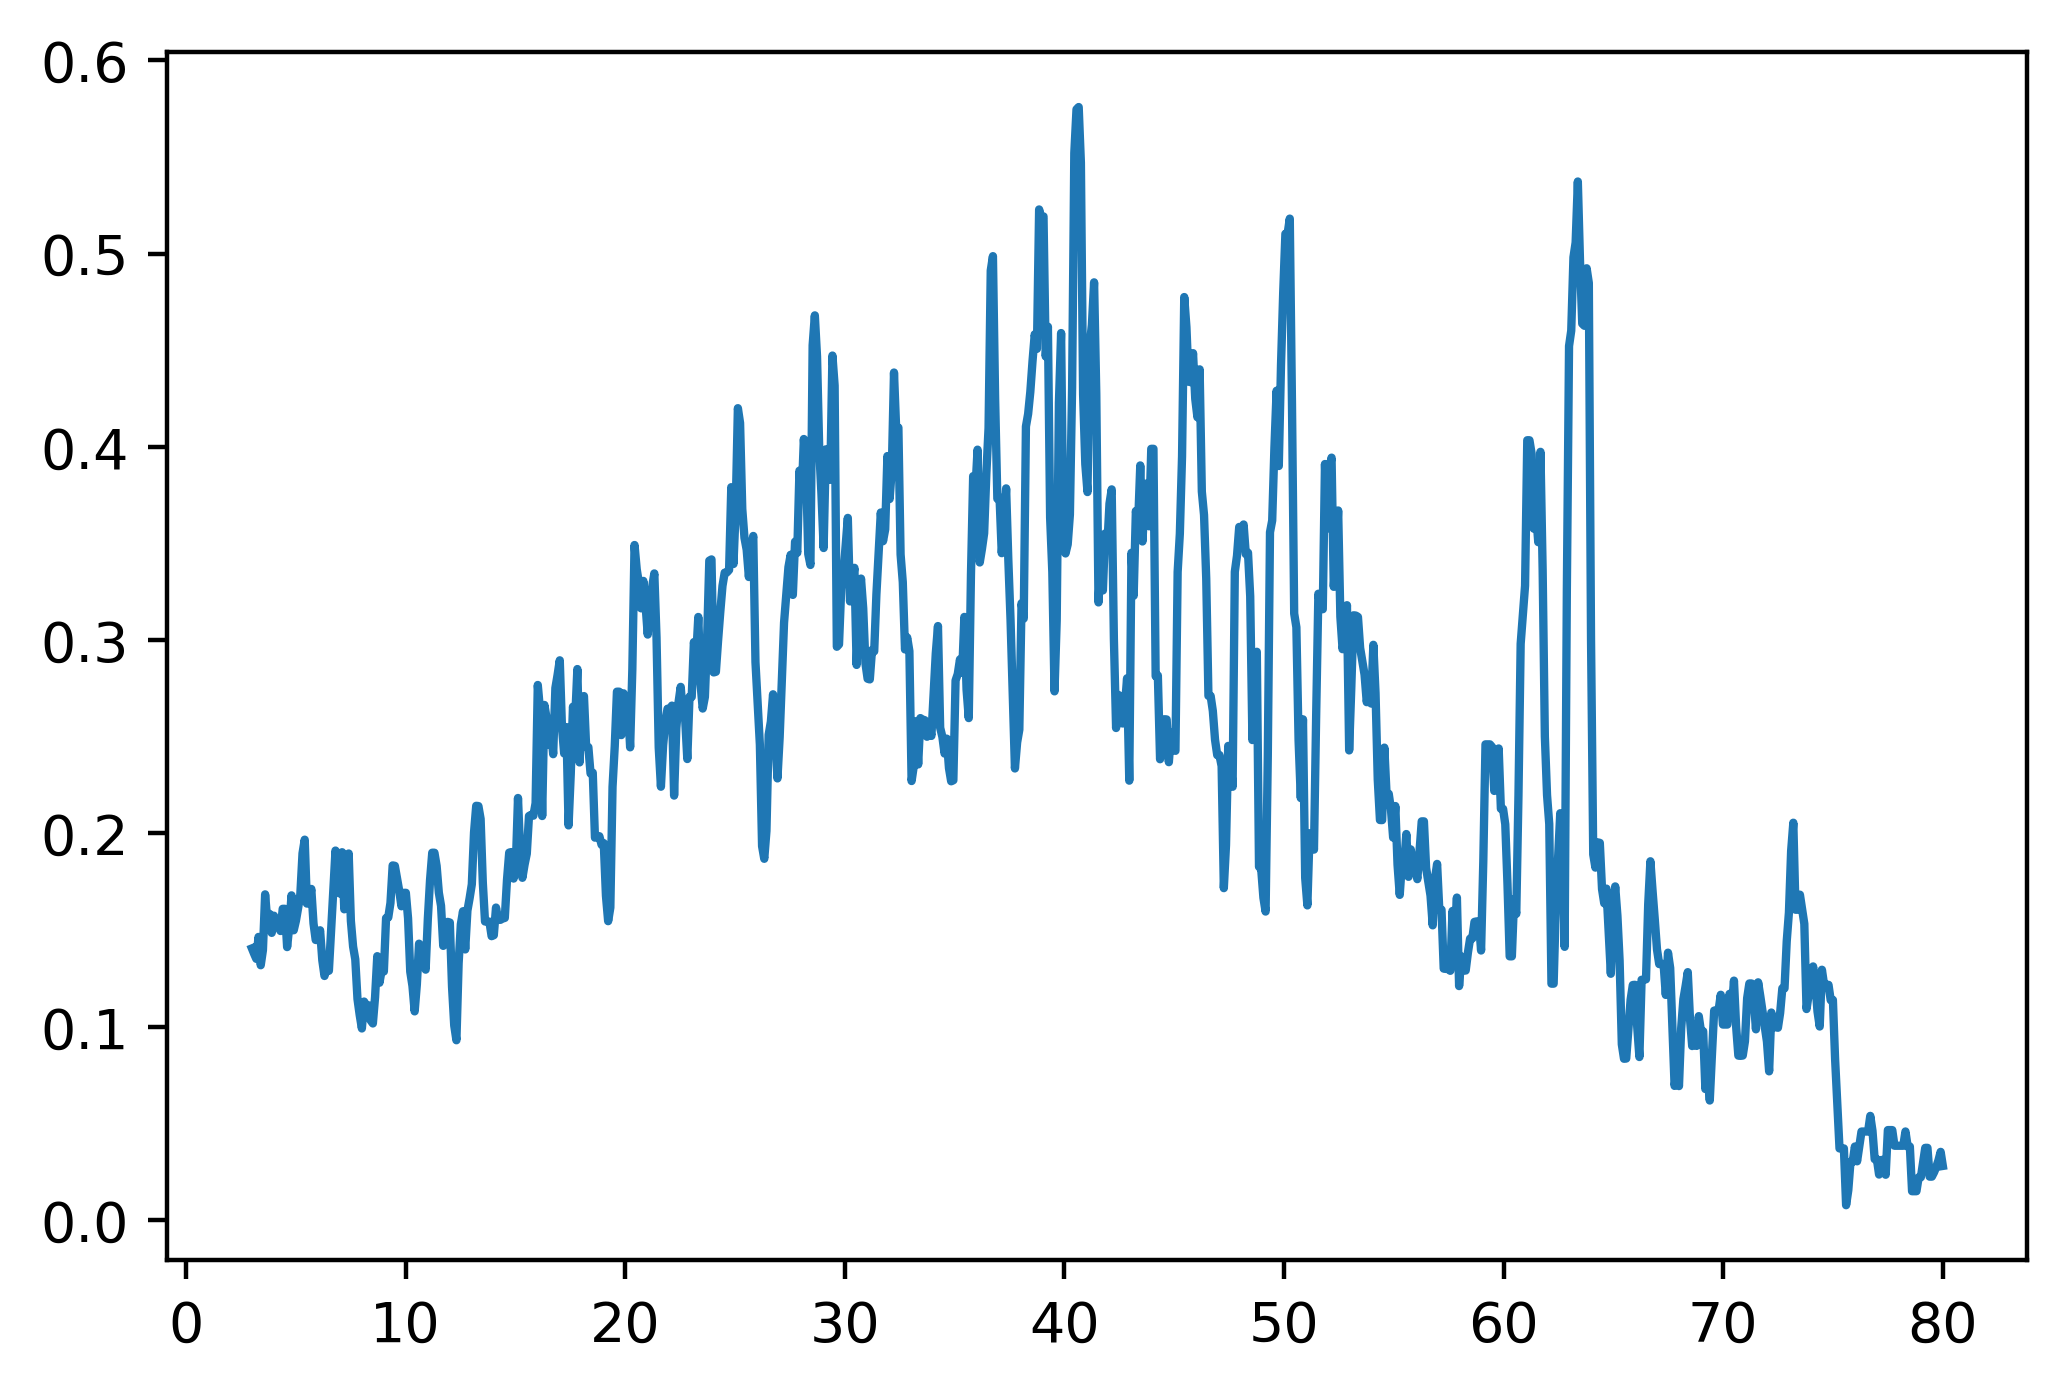

In [119]:
r = 5
gamma = []
for i in range(len(lr)):
    temp=0.0
    denominator=2*r+1
    for j in range(-r,r+1):
        if i+j<0. or i+j>769:
            temp+=0
            denominator-=1
        else:
            temp+=lr[i+j]
    temp/=denominator
    gamma.append(temp)
    
plt.plot(np.linspace(3,80,770),gamma)

(array([511., 129.,  87.,   9.,   0.,  24.,   0.,   4.,   0.,   6.]),
 array([0.00000000e+00, 4.44089210e-17, 8.88178420e-17, 1.33226763e-16,
        1.77635684e-16, 2.22044605e-16, 2.66453526e-16, 3.10862447e-16,
        3.55271368e-16, 3.99680289e-16, 4.44089210e-16]),
 <a list of 10 Patch objects>)

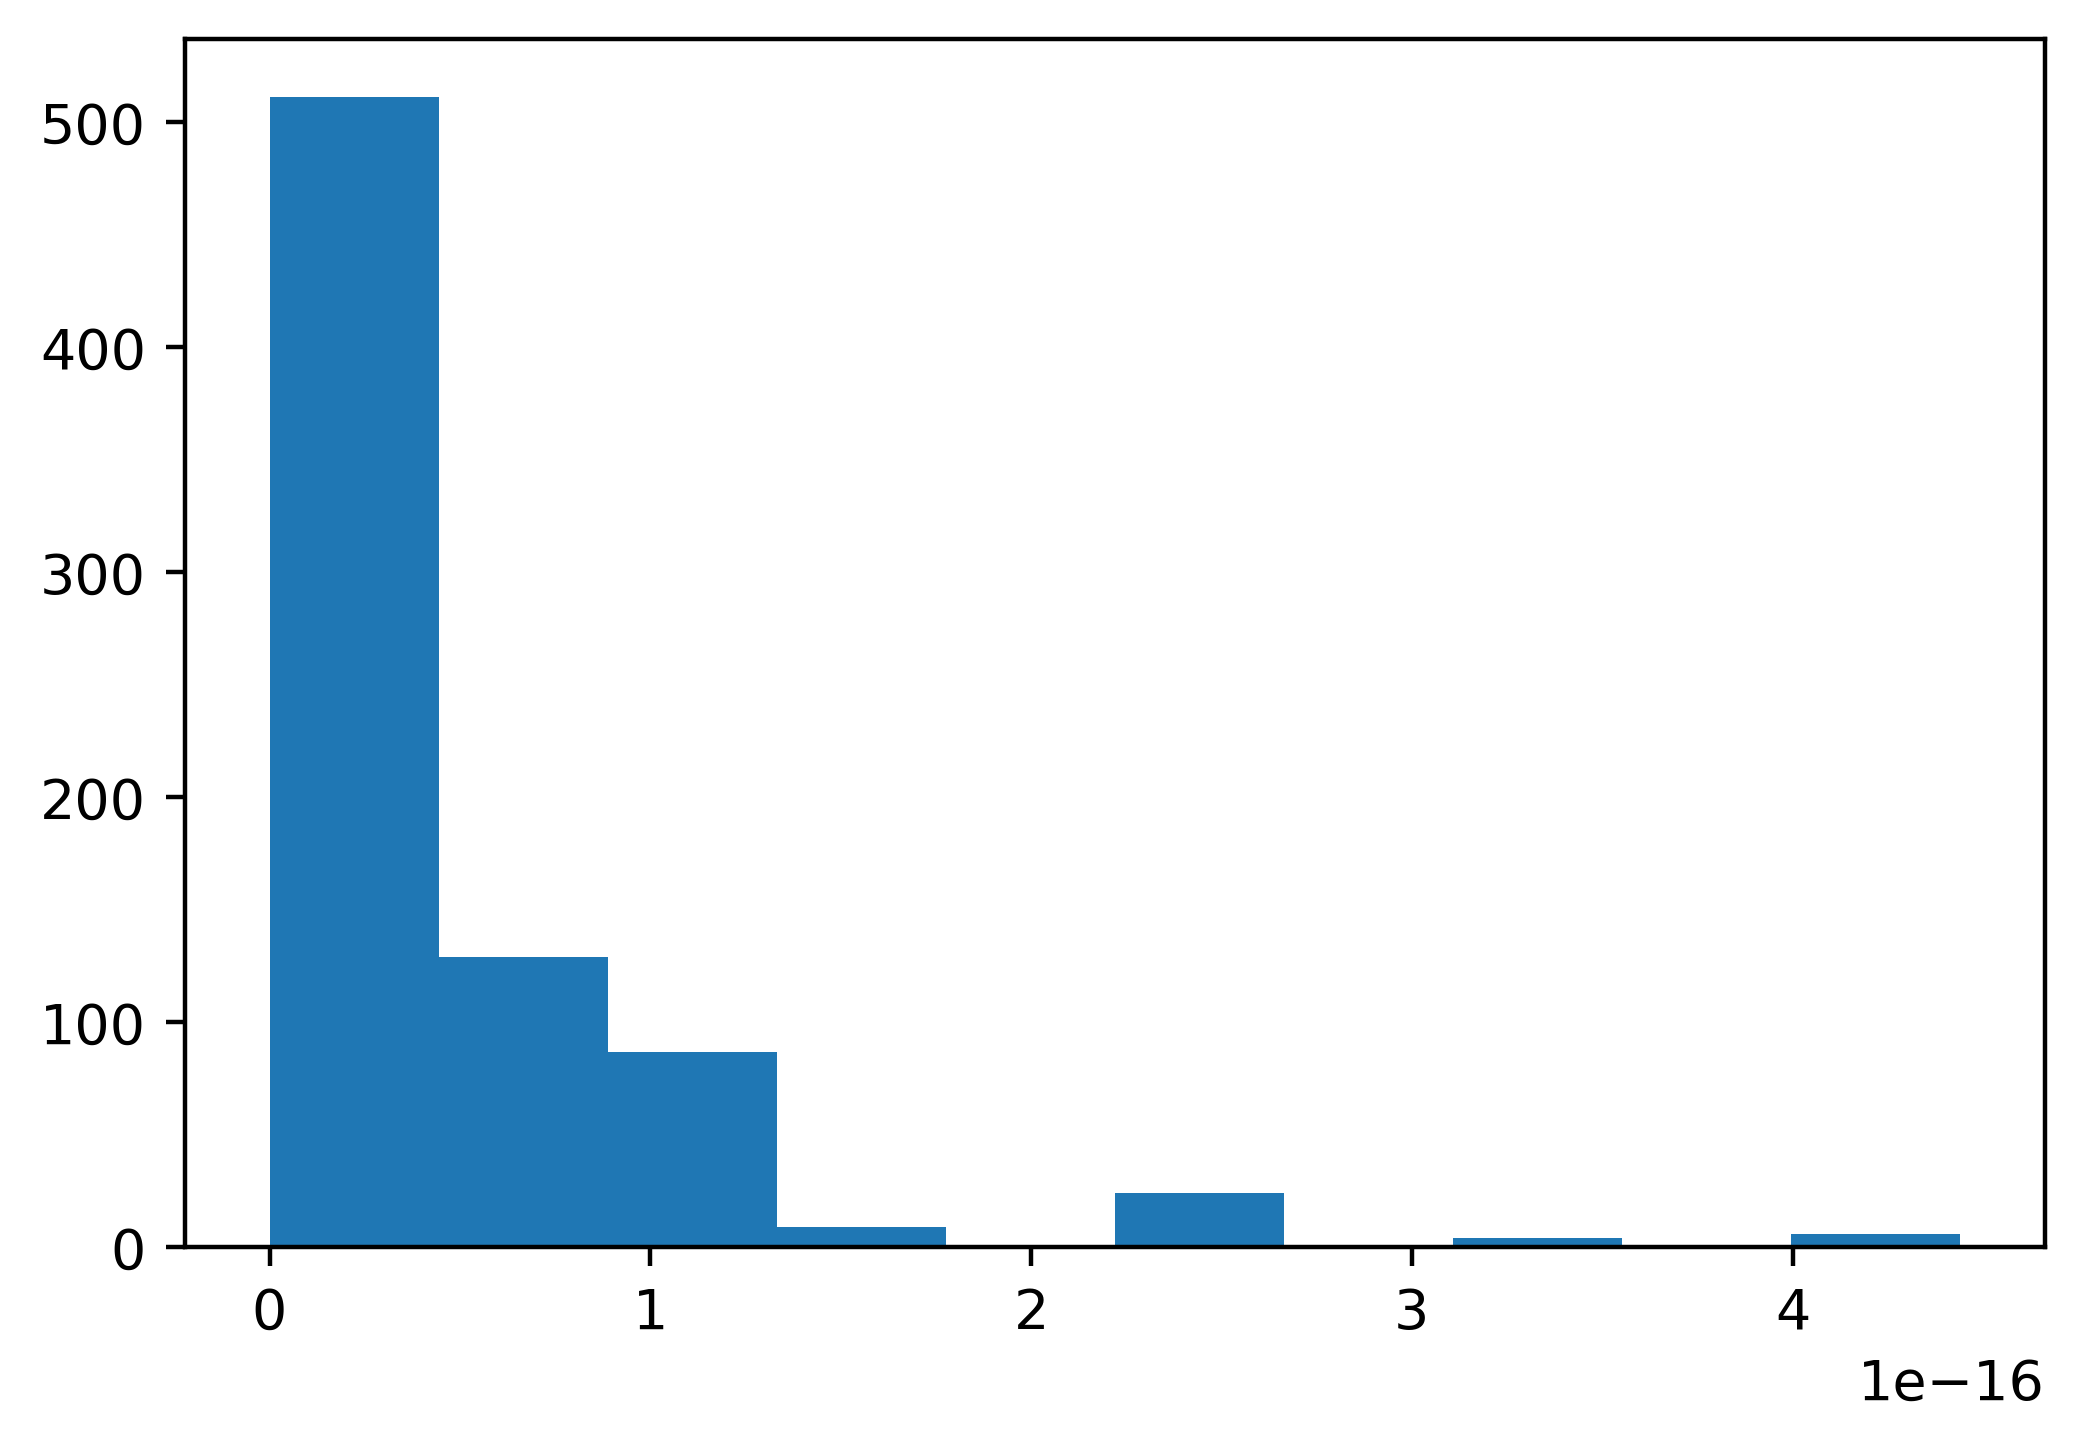

In [103]:
plt.hist(lrErr)